In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#For Warnings -

import warnings
warnings.filterwarnings('ignore')

#### Reading and Understanding Data -

In [3]:
#Reading File -

iris=pd.read_csv('E:\\iris.csv')

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
list(iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

#### Duplicates And Missing Values -

In [11]:
iris.duplicated().sum()

3

In [12]:
#Seeing Duplicates -

iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [13]:
#Removing Dulpicates -

iris.drop_duplicates(inplace = True)

#Checking after duplicates are removed -

iris.shape

(147, 5)

In [14]:
iris.species.value_counts()

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64

In [15]:
#Missing Values -

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Skewness and Kurtosis - 

In [16]:
iris.skew()

sepal_length    0.292560
sepal_width     0.324351
petal_length   -0.293763
petal_width    -0.113479
dtype: float64

In [17]:
iris.kurtosis()

sepal_length   -0.556956
sepal_width     0.246838
petal_length   -1.374462
petal_width    -1.317760
dtype: float64

#### Visualization -

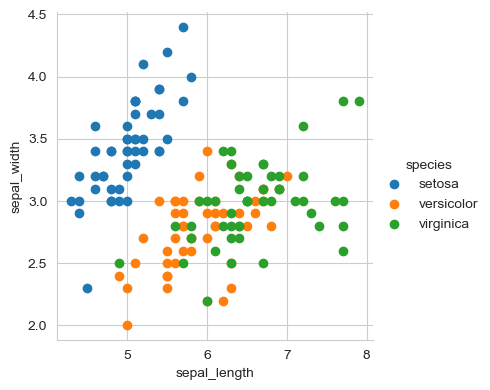

In [18]:
#Using Seaborn, which makes its more informative -

sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', size = 4).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

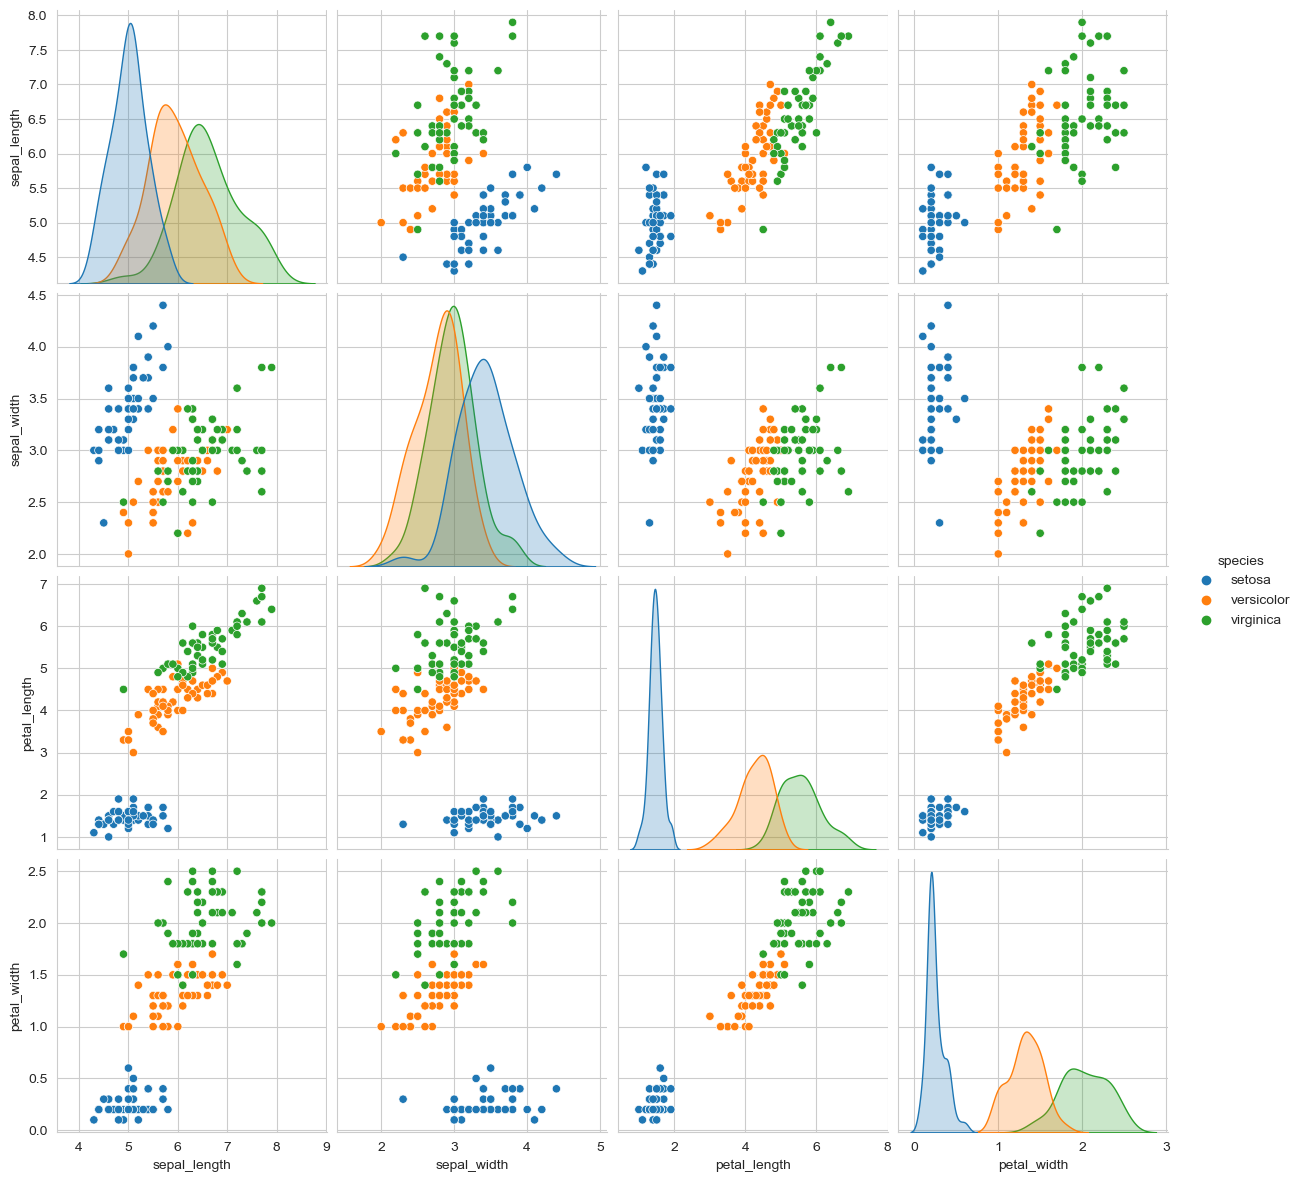

In [19]:
sns.pairplot(iris, hue='species', height=3)
plt.show()

#### Testing, Training and Label Encoding 

In [20]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [21]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
iris.species = lc.fit_transform(iris.species)

In [22]:
iris.species[: 8]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: species, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88, 4)
(88,)
(59, 4)
(59,)


#### Standard Scaler - 

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [54]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### KNN (n_neighbors = 8)  -

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [56]:
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


In [59]:
print(precision_score(y_test, y_pred, average = None))

[1.         0.83333333 1.        ]


In [60]:
print(recall_score(y_test, y_pred, average = None))

[1.         1.         0.80952381]


In [61]:
print(f1_score(y_test, y_pred, average = None))

[1.         0.90909091 0.89473684]


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        20
   virginica       1.00      0.81      0.89        21

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59



In [63]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  0]
 [ 0  4 17]]


#### KNN (n_neighbors = 3)  -

In [64]:
model = KNeighborsClassifier(n_neighbors =3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
y_pred = model.predict(x_test)

In [66]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


In [67]:
print(precision_score(y_test, y_pred, average = None))

[1.         0.83333333 1.        ]


In [68]:
print(recall_score(y_test, y_pred, average = None))

[1.         1.         0.80952381]


In [69]:
print(f1_score(y_test, y_pred, average = None))

[1.         0.90909091 0.89473684]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        20
   virginica       1.00      0.81      0.89        21

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59



In [71]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  0]
 [ 0  4 17]]


#### KNN (n_neighbors = 5) -

In [72]:
model = KNeighborsClassifier(n_neighbors =5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [73]:
y_pred = model.predict(x_test)

In [74]:
print(accuracy_score(y_test, y_pred))

0.9491525423728814


In [75]:
print(precision_score(y_test, y_pred, average = None))

[1.         0.86956522 1.        ]


In [76]:
print(recall_score(y_test, y_pred, average = None))

[1.         1.         0.85714286]


In [77]:
print(f1_score(y_test, y_pred, average = None))

[1.         0.93023256 0.92307692]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.86      0.92        21

    accuracy                           0.95        59
   macro avg       0.96      0.95      0.95        59
weighted avg       0.96      0.95      0.95        59



In [79]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  0]
 [ 0  3 18]]
